## Задания

1. Написать SimpleModel на другом уровне абстракции. Использовать model = nn.Sequential() https://pytorch.org/tutorials/beginner/nn_tutorial.html?highlight=mnist
2. С помощью библиотеки torch реализовать модель с прямым проходом, состоящую из 3 полносвязных слоёв с функциями активации: ReLU, tanh, Softmax. Длины векторов на входе 256, на выходе 4, промежуточные: 64 и 16. Использовать модули - nn.Module
3. Реализовать модель с прямым проходом, состоящую из 2 свёрток (Conv) с функциями активации ReLU и 2 функций MaxPool. Первый слой переводит из 3 каналов в 8, второй из 8 слоёв в 16. На вход подаётся изображение размера 19х19. (19х19x3 -> 18x18x8 -> 9x9x8 -> 8x8x16 -> 4x4x16). Использовать модули - nn.Module
4. Объединить сети из п.2 и п.1. На выход изображение размера 19х19, на выходе вектор из 4 элементов

### Task1

In [ ]:
from torch import nn
import torch
import numpy as np
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset

In [ ]:
# Простая модель
class SimpleModel(nn.Module):
    def __init__(self, in_ch, out_ch):
        """Регистрация блоков"""
        self.model_ = nn.Sequential(
                nn.Linear(in_ch, 32),
                nn.ReLU(),
                nn.Linear(out_ch, 12, bias=False),
                nn.ReLU(),
        )

    def forward(self, x):
        return self.model_(x)

### Task2

In [ ]:
model = nn.Sequential(
                nn.Linear(256, 64),
                nn.ReLU(),
                nn.Linear(64, 16),
                nn.Tanh(),
                nn.Linear(16, 4),
                nn.Softmax(dim = 1),
)

### Task3

Реализовать модель с прямым проходом, состоящую из 2 свёрток (Conv) с функциями активации ReLU и 2 функций MaxPool. Первый слой переводит из 3 каналов в 8, второй из 8 слоёв в 16. На вход подаётся изображение размера 19х19. (19х19x3 -> 18x18x8 -> 9x9x8 -> 8x8x16 -> 4x4x16). Использовать модули - nn.Module


In [ ]:
#https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [ ]:
model = nn.Sequential(
    nn.Conv2d(3,8,kernel_size=4,stride=1, padding=1), #18x18x8
    nn.MaxPool2d(kernel_size=2, stride=2), #9x9x8
    nn.Conv2d(8,16,kernel_size=3,stride=1, padding=0), #8x8x16
    nn.MaxPool2d(kernel_size=2, stride=2), #4x4x16
    nn.ReLU(),
)

### Task4

In [ ]:
model_combined = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=4, stride=1, padding=1),  # 18x18x8
    nn.MaxPool2d(kernel_size=2, stride=2),  # 9x9x8
    nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=0),  # 7x7x16
    nn.MaxPool2d(kernel_size=2, stride=2),  # 3x3x16
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(3 * 3 * 16, 64),
    nn.ReLU(),
    nn.Linear(64, 16),
    nn.Tanh(),
    nn.Linear(16, 4),
    nn.Softmax(dim=1),
)



## Лабораторная работа

1. С помощью библиотеки torch создать модель с прямым проходом, состоящую из 3 слоёв* с функциями активации: ReLu, ReLu, Softmax.
2. Обучить нейросеть распознавать рукописные цифры на датасете MNIST (28х28 px).
3. Два первых слоя могут быть полносвязные или свёрточные на ваш выбор. Последний слой - это FC слой с 10 нейронами.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
plt.rcParams['figure.figsize'] = 5, 5

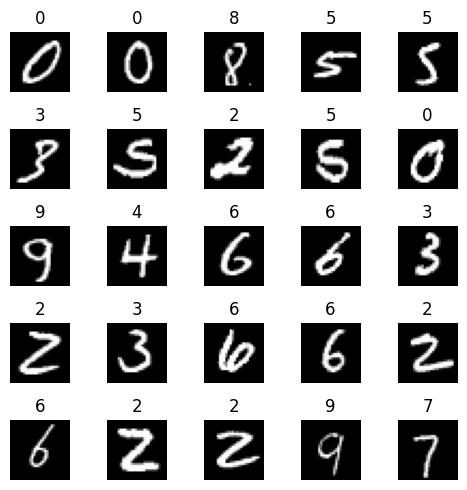

In [ ]:
from torch.utils.data import DataLoader, random_split
# Initializing the transform for the dataset
transform = torchvision.transforms.Compose([
                    torchvision.transforms.ToTensor(),
                    torchvision.transforms.Normalize((0.5), (0.5))
                                            ])

# Downloading the MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root="./MNIST/train", train=True,
    transform=torchvision.transforms.ToTensor(),
    download=True)

test_dataset = torchvision.datasets.MNIST(
    root="./MNIST/test", train=False,
    transform=torchvision.transforms.ToTensor(),
    download=True)

random_samples = np.random.randint(1, len(train_dataset), (25))

i = 0
for idx in random_samples:
    plt.subplot(5, 5, i + 1)
    i+=1
    plt.imshow(train_dataset[idx][0][0].numpy(), cmap='gray')
    plt.title(train_dataset[idx][1])
    plt.axis('off')


plt.tight_layout()
plt.show()

In [ ]:
bs = 64

In [ ]:
def encode_label(numb):
  vec = np.zeros((10,))
  vec[numb] = 1.0
  return vec

In [ ]:
encode_label(1)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
def shape_data(data):
  feauteres = [np.reshape(x[0][0].numpy(), (784,)) for x in data]
  labels = [encode_label(y[1]) for y in data]
  return zip(feauteres, labels)

In [ ]:
x_train, y_train = zip(*shape_data(train_dataset))
x_test, y_test = zip(*shape_data(test_dataset))



In [ ]:
import torch

x_train, y_train, x_test, y_test = map(
    torch.tensor, (x_train, y_train, x_test, y_test)
)

<ipython-input-8-a1d43cef6310>:3: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  x_train, y_train, x_test, y_test = map(


In [ ]:
from torch.utils.data import TensorDataset


train_ds = TensorDataset(x_train, y_train)
test_ds = TensorDataset(x_test, y_test)

In [ ]:
def get_data(train_ds, test_ds,bs):
        valid_size = int(0.7 * len(train_ds))
        train_size = len(train_ds) - valid_size

        train_subset, valid_subset = random_split(train_ds, [train_size, valid_size])
        train_loader = DataLoader(dataset=train_subset, batch_size=bs, shuffle=True)
        valid_loader = DataLoader(dataset=valid_subset, batch_size=bs*2, shuffle=False)

        test_loader = DataLoader(dataset=test_ds, batch_size=bs, shuffle=False)

        return (train_loader, valid_loader, test_loader)

In [ ]:
class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        for b in self.dl:
            yield (self.func(*b))


In [ ]:
def preprocess(x, y):
    return x.to(dev), y.to(dev)

In [ ]:
train_dl, valid_dl, test_dl = get_data(train_ds, test_ds, bs)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)
test_dl = WrappedDataLoader(test_dl, preprocess)

In [ ]:
from torch import nn

model = nn.Sequential(
    nn.Linear(28 * 28, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 10),
)

In [ ]:
import torch.nn.functional as F

loss_func = F.cross_entropy

In [ ]:
def calculate_accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    labels = torch.argmax(yb, dim=1)
    accuracy = (preds == labels).float().mean()
    return accuracy

In [ ]:
def loss_batch(model, loss_func, xb, yb, opt=None):
    predict = model(xb)
    loss = loss_func(predict, yb)
    acc = calculate_accuracy(predict, yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb), acc.item()

In [ ]:
import numpy as np


def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()

        with torch.no_grad():
            losses, nums, accs = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )

        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        val_accuracy = np.sum(np.multiply(accs, nums)) / np.sum(nums)

        print(f'EPOCH: {epoch}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}')

In [ ]:
print(torch.cuda.is_available())

True


In [ ]:
dev = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")

In [ ]:
for images, labels in valid_dl:
    print("Размеры изображений:", images.size())
    print("Размеры меток:", labels.size())
    break

Размеры изображений: torch.Size([128, 784])
Размеры меток: torch.Size([128, 10])


In [ ]:
for images, labels in train_dl:
    print("Размеры изображений:", images.size())
    print("Размеры меток:", labels.size())
    break

Размеры изображений: torch.Size([64, 784])
Размеры меток: torch.Size([64, 10])


In [ ]:
from torch import optim

model.to(dev)
opt = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

In [ ]:
fit(30, model, loss_func, opt, train_dl, valid_dl)

EPOCH: 0, Validation Loss: 0.1181, Validation Accuracy: 0.9725
EPOCH: 1, Validation Loss: 0.1290, Validation Accuracy: 0.9713
EPOCH: 2, Validation Loss: 0.1281, Validation Accuracy: 0.9743


KeyboardInterrupt: 

In [ ]:
import numpy as np
import tqdm

def test(model, loss_func, test_dl):
    model.eval()
    accs = []
    nums = []
    with torch.no_grad():
        for xb, yb in test_dl:
            predict = model(xb)
            temp_acc = accuracy(predict, yb)
            accs.append(temp_acc.item())
            nums.append(len(xb))
        test_accuracy = np.sum(np.multiply(accs, nums)) / np.sum(nums)

    print(f'Accuracy: {test_accuracy:.4f}')

In [ ]:
test(model, loss_func, test_dl)

Accuracy: 0.9685
